We are going to check that the computed curve has $6$ singular points of type $\mathbb{E}_6$

In [1]:
f, F0, F2a = load('files3/octica-3-final.sobj')
R = F2a.parent()
R.inject_variables()

Defining x, y, z


We compute the discriminant and we found there are exactly six values for which the discriminant is not reduced.

In [2]:
dis = F2a.discriminant(z).factor()
dis8 = [p for p in dis if p[1] > 1]
len(dis8), dis8[0][0].degree(), dis8[0][1]

(1, 6, 8)

To determine the coordinates of the singular point, we need a larger field, an extension of order $24$.

In [3]:
T.<t> = R.base_ring()[]
p = dis8[0][0](x=1, y=t)
K = R.base_ring().extension(p, 'a')
K1.<a> = K.absolute_field()
h = R.base_ring().embeddings(K1)[0]
K1.defining_polynomial().degree()

24

We take an affine chart for which the line at infinity does not contain singular points and we pass to the big field.

In [4]:
S.<u,v> = K1[]
g = vector(h(b) for b in F2a.coefficients()) * vector(u^j * v^k for i, j, k in F2a.exponents())

We compute the other coordinate of the singular point.

In [5]:
p1 = p.map_coefficients(h)
y0 = p1.roots()[0][0]

In [6]:
dis2 = g(u=y0).factor()
dis3 = [q for q in dis2 if q[1] > 1]
len(dis3), dis3[0][0].degree(), dis3[0][1]

(1, 1, 3)

In [7]:
z0 = K1(v.reduce([dis3[0][0]]))

We translate this point to the origin and we have that the point is a triple point.

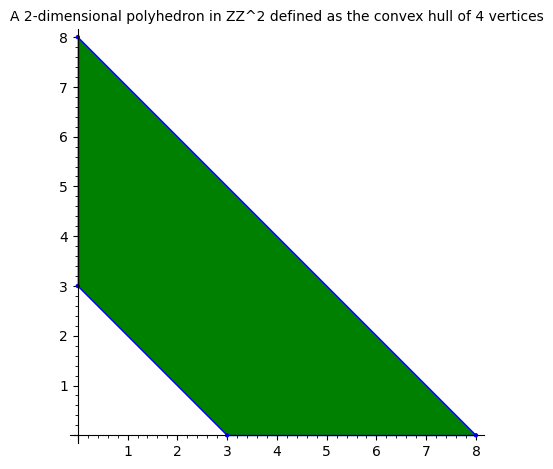

In [8]:
gs = g(u=u + y0, v=v + z0)
gs.newton_polytope()

The homogeneous polynomial associated to the edge is a triple power. With the suitable translation we obtain the desired Newton polygon.

In [9]:
dis4 = sum(a * b for a, b in gs if b.degree() == 3).factor()
dis5 = [q for q in dis4 if q[1] > 1]
len(dis5), dis5[0][0].degree(), dis5[0][1]

(1, 1, 3)

In [10]:
t0 = K1(v.reduce([dis5[0][0](u=1)]))

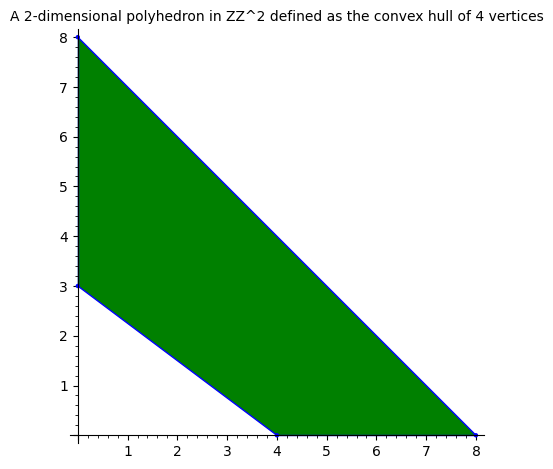

In [11]:
gs1 = gs(v=v + t0 * u)
gs1.newton_polytope()

Since all the singular points are permuted by a Galois action, this property holds for all of them.